In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import re
#imputer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('cleaned_data.csv')
data['User-Country'].describe()

count             25730
unique               76
top       United States
freq              20554
Name: User-Country, dtype: object

In [3]:
data['User-ID'] = data['User-ID'].astype(str)
data['Genre'] = data['Genre'].astype(str)
data['Book-Rating'] = data['Book-Rating'].astype(float)
data['User-Age'] = data['User-Age'].astype(int)

# User Interaction Features
# Count of Books Read per Genre
genre_counts = data.pivot_table(index='User-ID', columns='Genre', values='ISBN', aggfunc='count', fill_value=0)

# Average Rating per Genre
average_ratings = data.pivot_table(index='User-ID', columns='Genre', values='Book-Rating', aggfunc='mean', fill_value=0)

# Variability in Ratings per Genre
std_dev_ratings = data.pivot_table(index='User-ID', columns='Genre', values='Book-Rating', aggfunc='std', fill_value=0)

# Combine these features into a single DataFrame
user_features = genre_counts.join(average_ratings, rsuffix='_avg').join(std_dev_ratings, rsuffix='_std')

#add the age column from the original data to user_features
user_features = user_features.join(data[['User-ID', 'User-Age']].set_index('User-ID'))

#add the User-Country column from the original data to user_features
user_features = user_features.join(data[['User-ID', 'User-Country']].set_index('User-ID'))

# Example output
user_features.head(100)

,Fantasy,Fiction,Historical Fiction,Horror,Legal Thriller,Mystery,Romance,Science Fiction,Thriller,Fantasy_avg,...,Fiction_std,Historical Fiction_std,Horror_std,Legal Thriller_std,Mystery_std,Romance_std,Science Fiction_std,Thriller_std,User-Age,User-Country
User-ID,,,,,,,,,,,,,,,,,,,,,
100004,3,0,0,0,0,0,0,0,0,10.0,...,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,33,United States
100004,3,0,0,0,0,0,0,0,0,10.0,...,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,33,United States
100004,3,0,0,0,0,0,0,0,0,10.0,...,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,33,United States
100004,3,0,0,0,0,0,0,0,0,10.0,...,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,33,United States
100004,3,0,0,0,0,0,0,0,0,10.0,...,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,33,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100264,0,2,0,0,0,3,1,0,1,0.0,...,2.12132,0.0,0.0,0.0,0.57735,0.0,0.0,0.0,37,United States
100264,0,2,0,0,0,3,1,0,1,0.0,...,2.12132,0.0,0.0,0.0,0.57735,0.0,0.0,0.0,37,United States
100264,0,2,0,0,0,3,1,0,1,0.0,...,2.12132,0.0,0.0,0.0,0.57735,0.0,0.0,0.0,37,United States


In [4]:
import pandas as pd

bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['<18', '18-25', '25-35', '35-45', '45-55', '55-65', '65+']
user_features['Age Group'] = pd.cut(user_features['User-Age'], bins=bins, labels=labels, right=False)
user_features.head(100)

,Fantasy,Fiction,Historical Fiction,Horror,Legal Thriller,Mystery,Romance,Science Fiction,Thriller,Fantasy_avg,...,Historical Fiction_std,Horror_std,Legal Thriller_std,Mystery_std,Romance_std,Science Fiction_std,Thriller_std,User-Age,User-Country,Age Group
User-ID,,,,,,,,,,,,,,,,,,,,,
100004,3,0,0,0,0,0,0,0,0,10.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,33,United States,25-35
100004,3,0,0,0,0,0,0,0,0,10.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,33,United States,25-35
100004,3,0,0,0,0,0,0,0,0,10.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,33,United States,25-35
100004,3,0,0,0,0,0,0,0,0,10.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,33,United States,25-35
100004,3,0,0,0,0,0,0,0,0,10.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,33,United States,25-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100264,0,2,0,0,0,3,1,0,1,0.0,...,0.0,0.0,0.0,0.57735,0.0,0.0,0.0,37,United States,35-45
100264,0,2,0,0,0,3,1,0,1,0.0,...,0.0,0.0,0.0,0.57735,0.0,0.0,0.0,37,United States,35-45
100264,0,2,0,0,0,3,1,0,1,0.0,...,0.0,0.0,0.0,0.57735,0.0,0.0,0.0,37,United States,35-45


#### Downmsampling Age Group

In [5]:
"""age_group_counts = user_features['Age Group'].value_counts()
print(age_group_counts)
# Calculate the target size, for example, the median size of the age groups
target_size = age_group_counts.median()

# Separate the overrepresented group from the rest
overrepresented = user_features[user_features['Age Group'] == '25-35']
other_groups = user_features[user_features['Age Group'] != '25-35']

# Downsample the overrepresented group
downsampled = overrepresented.sample(n=int(target_size), random_state=42)

balanced_user_features = pd.concat([downsampled, other_groups], ignore_index=True)
user_features = pd.concat([downsampled, other_groups], ignore_index=True)

age_group_counts = user_features['Age Group'].value_counts()
print(age_group_counts)"""

"age_group_counts = user_features['Age Group'].value_counts()\nprint(age_group_counts)\n# Calculate the target size, for example, the median size of the age groups\ntarget_size = age_group_counts.median()\n\n# Separate the overrepresented group from the rest\noverrepresented = user_features[user_features['Age Group'] == '25-35']\nother_groups = user_features[user_features['Age Group'] != '25-35']\n\n# Downsample the overrepresented group\ndownsampled = overrepresented.sample(n=int(target_size), random_state=42)\n\nbalanced_user_features = pd.concat([downsampled, other_groups], ignore_index=True)\nuser_features = pd.concat([downsampled, other_groups], ignore_index=True)\n\nage_group_counts = user_features['Age Group'].value_counts()\nprint(age_group_counts)"

In [6]:
age_group_counts = user_features['Age Group'].value_counts()
print(age_group_counts)

Age Group
25-35    81964
35-45    24052
45-55    18527
18-25    12145
<18       3396
55-65     3065
65+        960
Name: count, dtype: int64


In [7]:
from sklearn.impute import SimpleImputer

# Numeric columns: Impute with median
numeric_columns = user_features.select_dtypes(include=['int64', 'float64']).columns
numeric_imputer = SimpleImputer(strategy='median')
user_features[numeric_columns] = numeric_imputer.fit_transform(user_features[numeric_columns])

# Categorical columns: Impute with the most frequent value
categorical_columns = user_features.select_dtypes(include=['object']).columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
user_features[categorical_columns] = categorical_imputer.fit_transform(user_features[categorical_columns])

In [8]:
age_group_counts = user_features['Age Group'].value_counts()
print(age_group_counts)

Age Group
25-35    81964
35-45    24052
45-55    18527
18-25    12145
<18       3396
55-65     3065
65+        960
Name: count, dtype: int64


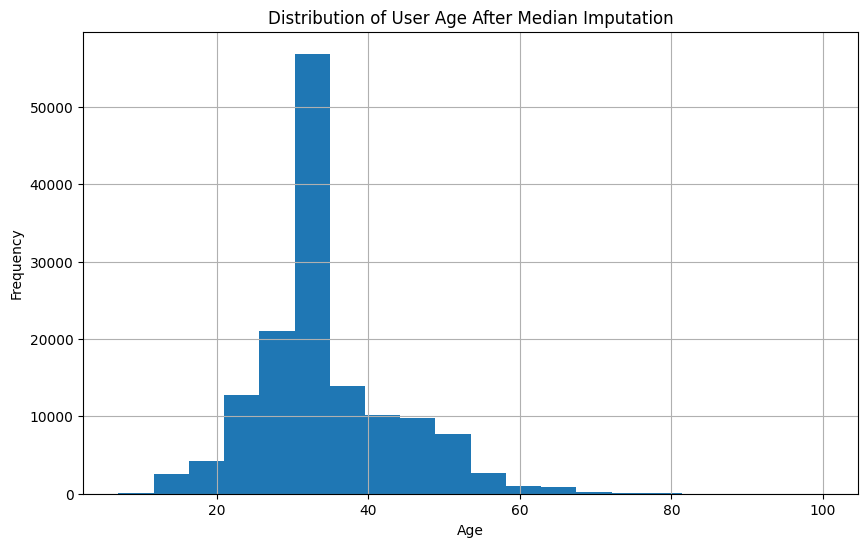

In [9]:
# Plot the distribution of the age data after imputation
plt.figure(figsize=(10, 6))
user_features['User-Age'].hist(bins=20)
plt.title('Distribution of User Age After Median Imputation')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [10]:
# One-hot encoding for country
country_dummies = pd.get_dummies(user_features['User-Country'], prefix='Country')
# One-hot encoding for age group
age_dummies = pd.get_dummies(user_features['Age Group'], prefix='Age')
#copy the original data to a new dataframe
user_features_visual = user_features.copy()
# Dropping the original columns
user_features.drop(['User-Country', 'Age Group'], axis=1, inplace=True)

# Adding these to the main DataFrame
user_features = pd.concat([user_features, country_dummies], axis=1)
user_features = pd.concat([user_features, age_dummies], axis=1)

user_features.head(100)

,Fantasy,Fiction,Historical Fiction,Horror,Legal Thriller,Mystery,Romance,Science Fiction,Thriller,Fantasy_avg,...,Country_Venezuela,Country_Yugoslavia,Country_Zimbabwe,Age_<18,Age_18-25,Age_25-35,Age_35-45,Age_45-55,Age_55-65,Age_65+
User-ID,,,,,,,,,,,,,,,,,,,,,
100004,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,...,False,False,False,False,False,True,False,False,False,False
100004,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,...,False,False,False,False,False,True,False,False,False,False
100004,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,...,False,False,False,False,False,True,False,False,False,False
100004,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,...,False,False,False,False,False,True,False,False,False,False
100004,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100264,0.0,2.0,0.0,0.0,0.0,3.0,1.0,0.0,1.0,0.0,...,False,False,False,False,False,False,True,False,False,False
100264,0.0,2.0,0.0,0.0,0.0,3.0,1.0,0.0,1.0,0.0,...,False,False,False,False,False,False,True,False,False,False
100264,0.0,2.0,0.0,0.0,0.0,3.0,1.0,0.0,1.0,0.0,...,False,False,False,False,False,False,True,False,False,False


In [11]:
from sklearn.preprocessing import StandardScaler

# Select only numerical features for scaling
numerical_features = user_features.select_dtypes(include=['int64', 'float64'])
scaler = StandardScaler()
scaled_numerical_features = scaler.fit_transform(numerical_features)

# Combine scaled numerical features back with categorical
scaled_features = pd.concat([pd.DataFrame(scaled_numerical_features, columns=numerical_features.columns, index=numerical_features.index), user_features.select_dtypes(include=['uint8', 'category'])], axis=1)

# K-MEANS

In [12]:
from sklearn.cluster import KMeans
# Apply K-means clustering
kmeans = KMeans(n_clusters=7)  # Adjust the number of clusters as needed
clusters = kmeans.fit_predict(scaled_features)
user_features['Cluster'] = clusters
cluster_profiles = user_features.groupby('Cluster').mean()
print(cluster_profiles.head())

          Fantasy    Fiction  Historical Fiction    Horror  Legal Thriller  \
Cluster                                                                      
0        6.773300   6.420975            2.160371  1.577337        1.011184   
1        3.248335   0.080930            0.263124  0.349306        0.219461   
2        5.293234   3.941602            1.243051  0.447598        0.419801   
3        9.688837   1.372138            0.745450  4.697475        1.756102   
4        3.444027  10.081430            2.647520  0.000000        2.942069   

          Mystery   Romance  Science Fiction  Thriller  Fantasy_avg  ...  \
Cluster                                                              ...   
0        0.603925  1.668777         2.171555  4.821481     7.987941  ...   
1        0.404002  0.245694         0.209513  0.714751     5.901307  ...   
2        3.902242  1.241299         0.688196  1.772522     7.775783  ...   
3        1.021807  0.277950         0.613268  4.668120     8.349369  ... 

In [13]:
# Group by cluster and calculate mean for numerical features and mode for categorical features
cluster_summary = user_features.groupby('Cluster').agg({**{col: 'mean' for col in user_features.columns if user_features[col].dtype != 'object'},
                                                       **{col: lambda x: x.mode()[0] if not x.mode().empty else np.nan for col in user_features.columns if user_features[col].dtype == 'object'}})
cluster_summary

,Fantasy,Fiction,Historical Fiction,Horror,Legal Thriller,Mystery,Romance,Science Fiction,Thriller,Fantasy_avg,...,Country_Yugoslavia,Country_Zimbabwe,Age_<18,Age_18-25,Age_25-35,Age_35-45,Age_45-55,Age_55-65,Age_65+,Cluster
Cluster,,,,,,,,,,,,,,,,,,,,,
0,6.773300,6.420975,2.160371,1.577337,1.011184,0.603925,1.668777,2.171555,4.821481,7.987941,...,0.000000,0.000000,0.000000,0.043539,0.653654,0.214954,0.087853,0.000000,0.000000,0.0
1,3.248335,0.080930,0.263124,0.349306,0.219461,0.404002,0.245694,0.209513,0.714751,5.901307,...,0.000029,0.000000,0.047331,0.121893,0.527568,0.164529,0.090965,0.035682,0.011767,1.0
2,5.293234,3.941602,1.243051,0.447598,0.419801,3.902242,1.241299,0.688196,1.772522,7.775783,...,0.000000,0.000000,0.000000,0.014210,0.565211,0.182356,0.227751,0.004866,0.005606,2.0
3,9.688837,1.372138,0.745450,4.697475,1.756102,1.021807,0.277950,0.613268,4.668120,8.349369,...,0.000000,0.000000,0.077581,0.203221,0.678521,0.002097,0.038581,0.000000,0.000000,3.0
4,3.444027,10.081430,2.647520,0.000000,2.942069,4.503590,2.939785,0.580940,6.708877,8.083755,...,0.000000,0.000000,0.000000,0.023499,0.513055,0.052872,0.410574,0.000000,0.000000,4.0
5,8.749299,0.943439,0.365478,0.376943,0.173503,0.171975,0.202930,3.796688,0.874777,8.156240,...,0.000000,0.000000,0.012739,0.030318,0.702548,0.140510,0.113885,0.000000,0.000000,5.0
6,2.131706,3.202622,0.539347,0.211326,0.181711,0.142286,0.534916,0.182028,0.719634,5.083665,...,0.000000,0.000023,0.017136,0.094993,0.529558,0.209178,0.100780,0.038974,0.009382,6.0


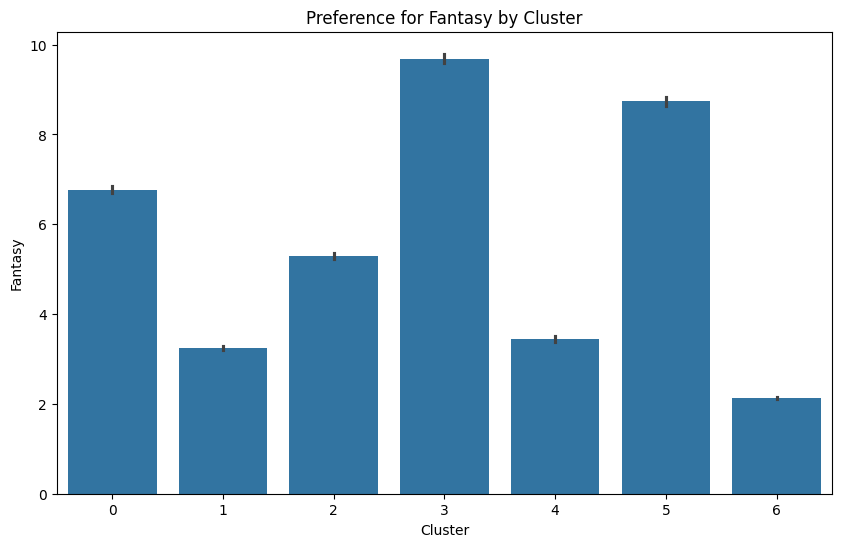

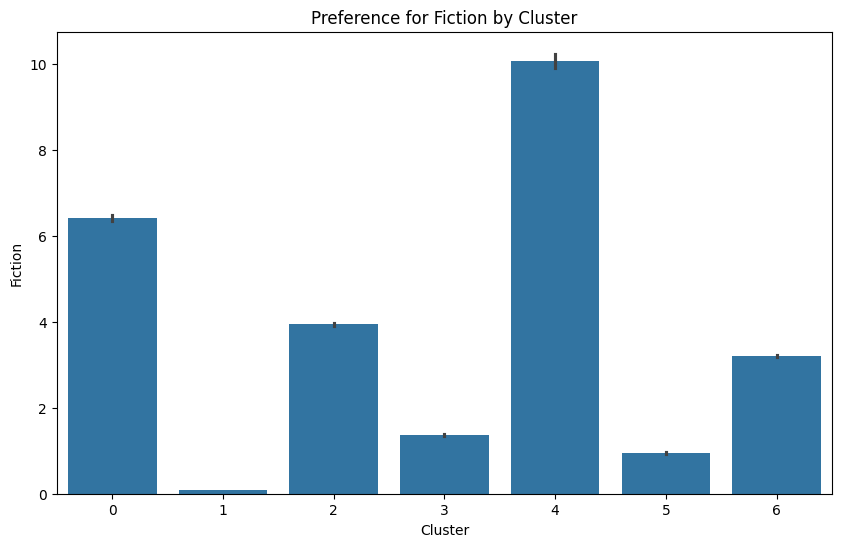

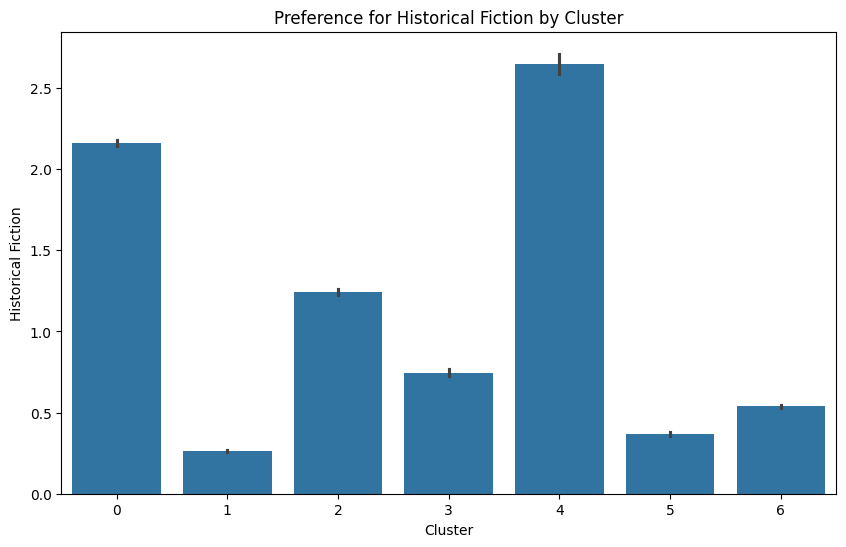

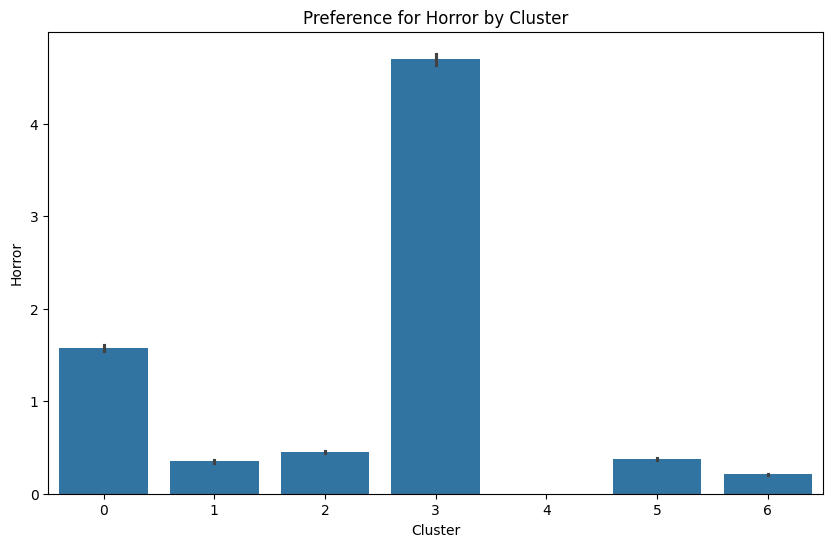

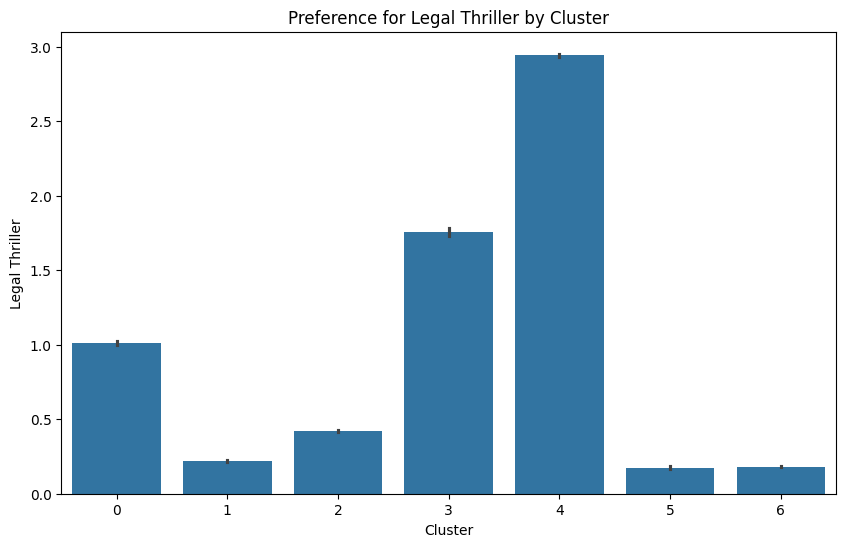

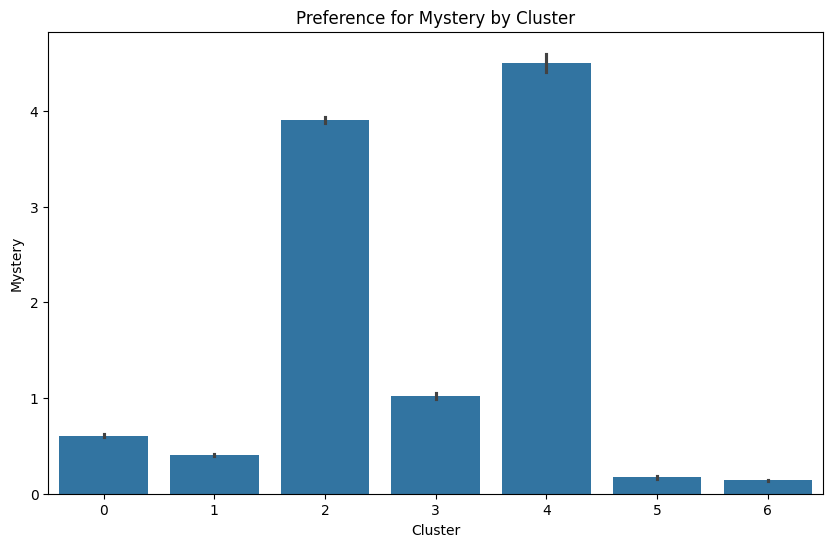

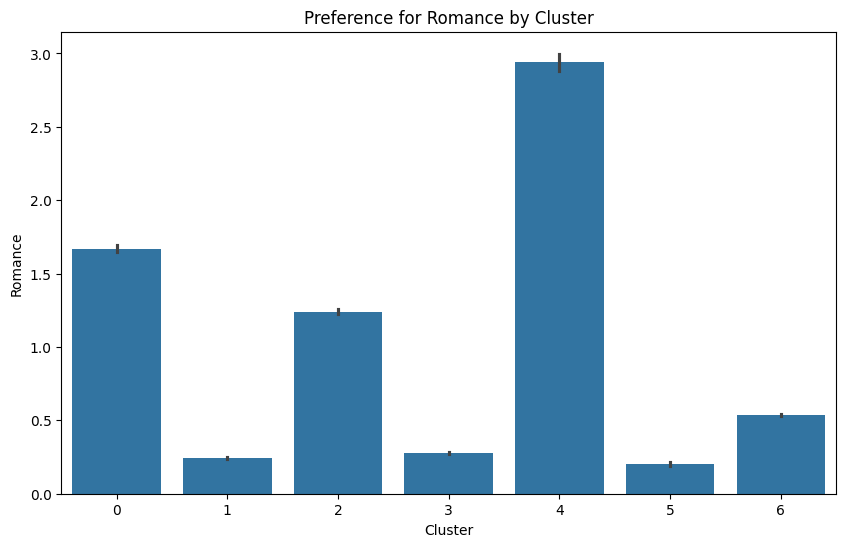

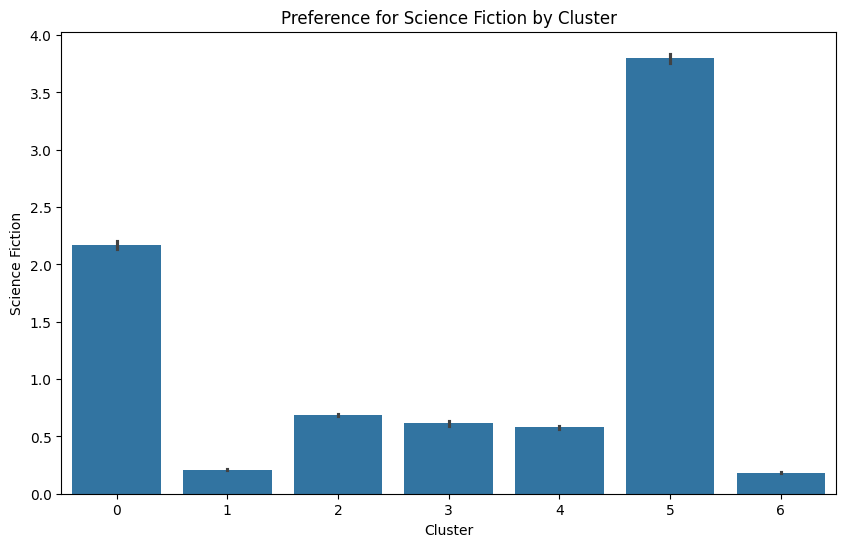

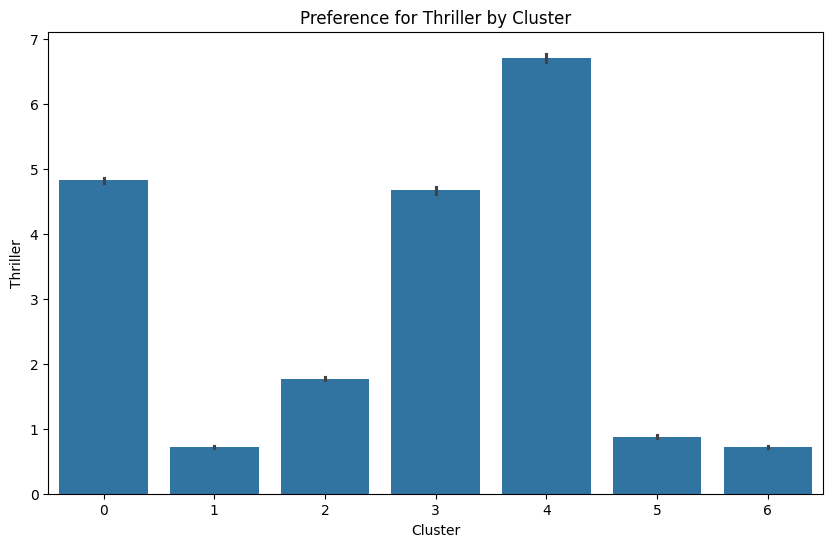

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

#extracting genre columns
genre_columns = [col for col in cluster_summary.columns]
genre_columns = genre_columns[0:9]

# Visualization of genre preferences per cluster
for genre in genre_columns:  # assuming genre_columns is a list of all your genre dummy columns
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Cluster', y=genre, data=user_features)
    plt.title(f'Preference for {genre} by Cluster')
    plt.show()


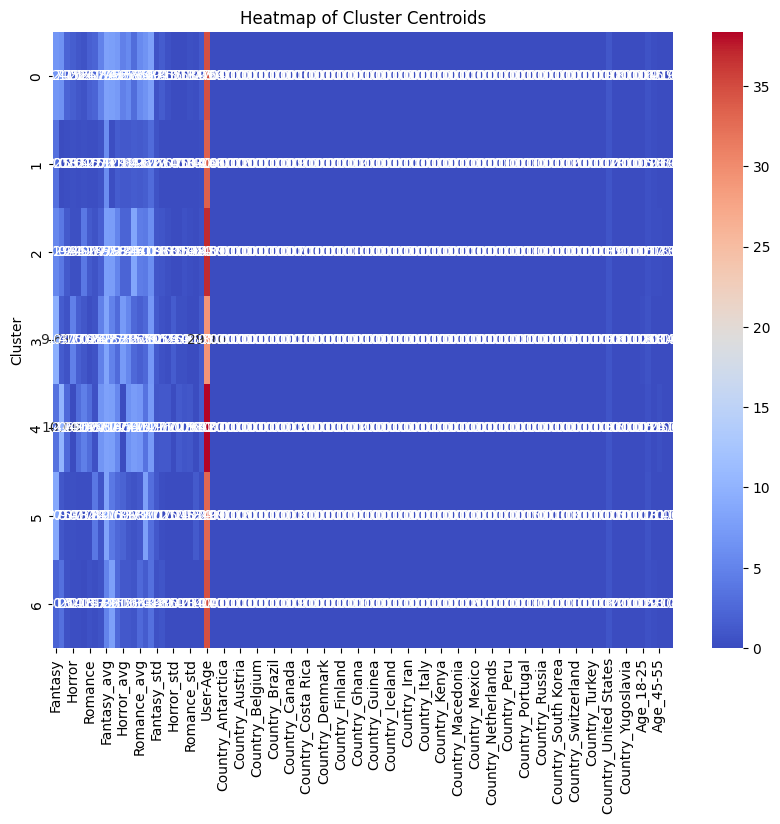

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of cluster centroids
plt.figure(figsize=(10, 8))
sns.heatmap(cluster_profiles, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Cluster Centroids')
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score
score = silhouette_score(scaled_features, clusters)
print('Silhouette Score: %.2f' % score)